<a href="https://colab.research.google.com/github/Sienyx/Sienova/blob/main/bisection_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BISECTION METHOD FOR ROOT FINDING
Equation: f(x) = x³ - 2x² - 5x + 6 = 0

Initial interval: [0, 2]
f(0) = 6
f(2) = -4

Iteration 01: a=0.000000, b=2.000000, c=1.000000, f(c)=0.000000, Error=100.000000%

✅ Root found at x = 1.00000000
f(1.00000000) = 0.0000000000

ITERATION TABLE
 Iteration  a  b  c (midpoint)  f(a)  f(b)  f(c)  Error (%)
         1  0  2           1.0     6    -4   0.0        100


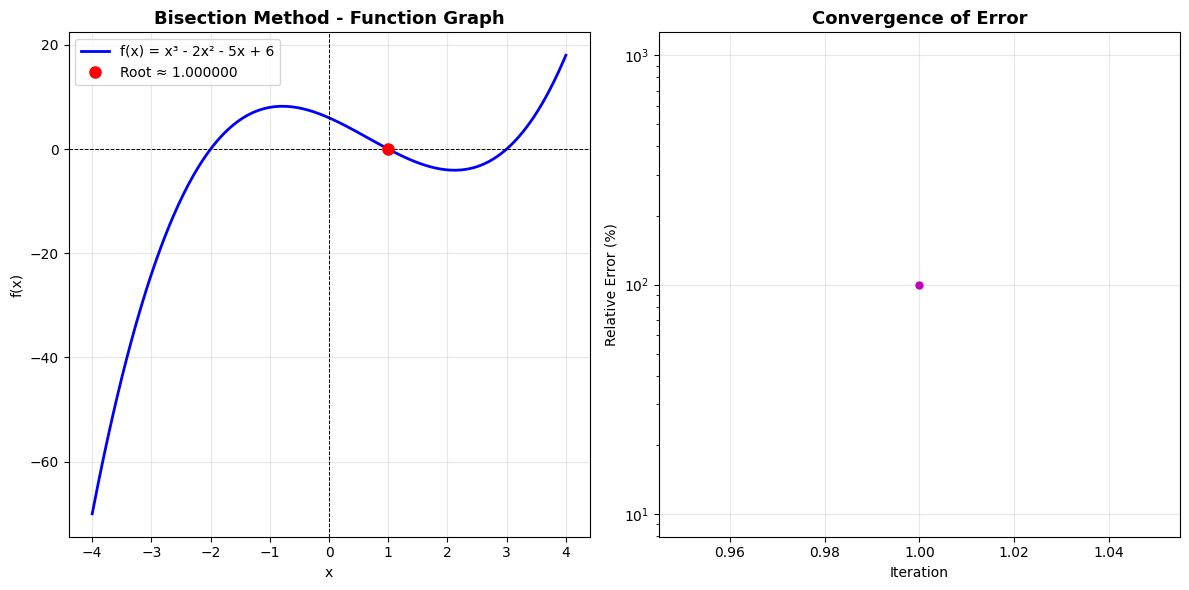


💾 Results saved to 'bisection_results.csv'


In [1]:
# ============================================================
# 🧮 BISECTION METHOD FOR ROOT FINDING
# Equation: f(x) = x³ - 2x² - 5x + 6 = 0
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Define the function
# ------------------------------------------------------------
def f(x):
    """
    Define the function f(x) = x³ - 2x² - 5x + 6
    """
    return x**3 - 2*x**2 - 5*x + 6


# ------------------------------------------------------------
# Bisection Method Implementation
# ------------------------------------------------------------
def bisection_method(func, a, b, tolerance=1e-6, max_iterations=100):
    """
    Bisection Method Implementation

    Parameters:
    - func: The function whose root we want to find
    - a: Left endpoint
    - b: Right endpoint
    - tolerance: Stopping criterion
    - max_iterations: Max number of iterations

    Returns:
    - root: Approximated root
    - df: DataFrame with iteration data
    """
    if func(a) * func(b) >= 0:
        print("❌ Error: f(a) and f(b) must have opposite signs!")
        return None, None

    iterations, a_list, b_list, c_list, f_a_list, f_b_list, f_c_list, err_list = [], [], [], [], [], [], [], []
    c_old = a

    for i in range(max_iterations):
        c = (a + b) / 2
        f_a, f_b, f_c = func(a), func(b), func(c)
        error = abs((c - c_old) / c) * 100 if i > 0 else 100

        iterations.append(i + 1)
        a_list.append(a)
        b_list.append(b)
        c_list.append(c)
        f_a_list.append(f_a)
        f_b_list.append(f_b)
        f_c_list.append(f_c)
        err_list.append(error)

        print(f"Iteration {i+1:02d}: a={a:.6f}, b={b:.6f}, c={c:.6f}, f(c)={f_c:.6f}, Error={error:.6f}%")

        if abs(f_c) < tolerance or error < tolerance:
            print(f"\n✅ Root found at x = {c:.8f}")
            print(f"f({c:.8f}) = {f_c:.10f}")
            break

        if f_a * f_c < 0:
            b = c
        else:
            a = c

        c_old = c

    df = pd.DataFrame({
        "Iteration": iterations,
        "a": a_list,
        "b": b_list,
        "c (midpoint)": c_list,
        "f(a)": f_a_list,
        "f(b)": f_b_list,
        "f(c)": f_c_list,
        "Error (%)": err_list
    })

    return c, df


# ------------------------------------------------------------
# Main Execution
# ------------------------------------------------------------
print("="*70)
print("BISECTION METHOD FOR ROOT FINDING")
print("="*70)
print("Equation: f(x) = x³ - 2x² - 5x + 6 = 0")
print("="*70)

a, b = 0, 2
print(f"\nInitial interval: [{a}, {b}]")
print(f"f({a}) = {f(a)}")
print(f"f({b}) = {f(b)}")
print("\n" + "="*70)

root, df = bisection_method(f, a, b, tolerance=1e-6, max_iterations=50)

# ------------------------------------------------------------
# Display iteration table
# ------------------------------------------------------------
if df is not None:
    print("\n" + "="*70)
    print("ITERATION TABLE")
    print("="*70)
    print(df.to_string(index=False))

# ------------------------------------------------------------
# Visualization
# ------------------------------------------------------------
x = np.linspace(-4, 4, 400)
y = f(x)

plt.figure(figsize=(12, 6))

# Plot 1: Function and Root
plt.subplot(1, 2, 1)
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x³ - 2x² - 5x + 6')
plt.axhline(0, color='k', linestyle='--', linewidth=0.7)
plt.axvline(0, color='k', linestyle='--', linewidth=0.7)
if root is not None:
    plt.plot(root, f(root), 'ro', markersize=8, label=f'Root ≈ {root:.6f}')
plt.title("Bisection Method - Function Graph", fontsize=13, fontweight='bold')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 2: Convergence
plt.subplot(1, 2, 2)
if df is not None:
    plt.semilogy(df["Iteration"], df["Error (%)"], 'm-o', linewidth=2, markersize=5)
    plt.title("Convergence of Error", fontsize=13, fontweight='bold')
    plt.xlabel("Iteration")
    plt.ylabel("Relative Error (%)")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Save results
# ------------------------------------------------------------
if df is not None:
    df.to_csv("bisection_results.csv", index=False)
    print("\n💾 Results saved to 'bisection_results.csv'")


# New Section